# 随机变量视角
1. 将价格、收益、因子、风险指标视为随机变量
1. 离散 / 连续随机变量的直觉区分
1. 样本与随机变量实现的关系

## 随机变量定义

**在概率论中,随机变量是一个可被测量的变量**

随机变量不仅是把未来的结果映射到数值,更需要满足可测性

```c
    对于任意实数集合 𝐵⊆𝑅 (B是R的一个子集)
    {ω:X(ω)∈B} 必须是可事件的,是对某个σ-代数 𝐹可测
        X = 随机变量,在所有可能世界ω中取值,然后使用B集合里面的范围对于X(ω)进行筛选
```

对于不是随机变量的例子是什么呢 ? 
- 假设你定义$Y = P_{t+1}(ω) + P_{t+2}(ω)$ 但你只取了某个不可观察的信息(比如未来的新闻影响..)来计算Y
    - 这种Y不是随机变量,因为在当前信息$F_t$下,它对应的事件集合可能不可测,无法用概率处理.
- 比如定义一个函数 $S(ω)= 1$,如果明天涨,-1,如果明天跌
    - 这个函数无法依赖你当下的信息观察到未来的事件,他就不是随机变量
- 如果定义 $Z=max(P_{t+1},P_{t+2}) - min(P_{t+1},P_{t+2})$
    - Z 是随机变量，但在 $𝐹_𝑡$ 下不可测，因此在 t 时刻无法被定价、预测或作为交易决策变量
---

$$P_t : Ω→R $$
本身是正确的,但是缺乏描述,需要更加注意**时间索引和信息集合**
- 函数$P_t$= 当下的价格(使用金融价格序列作为例子)
    - $P_t$是函数,函数输出一个实数$ P_t(ω) $ 这就是价格在该世界下的取值
- 时间索引t的作用
    - $P_t$展示的是当下的价格,而不是 $t+1,t+2...$
    - 不同时刻对应不同的随机变量 $P_{t+1},P_{t+2}.....$
- 信息集合$F_t$的作用
    - 你在t观察或预测的内容,必须建立在$F_t$(当前可被观测到的信息),而不是$F_{t+1}$ 未来信息

---
$$信息集合F_t$$

准确来说$F_t$是一个σ-代数
- σ-代数具有三个特质
    1. 包含全集 = $F_t$ = 所有你可以观察到的信息集合(相当于所有可能世界ω)
    2. 补集封闭 = 如果某事可被观测,那么对立事件也需要观测(相当于一个事情的另一面,open = close,可能=不可能)
    3. 可数并封闭 = 可观察到事件(1,2,3,4..),那么就可以观察到事件并集,1和2同时发生,2,3同时发生.....
- σ-代数保证
    1. $F_t$里的事件可量化概率计算.
    2. 可以构建不同的组合后,还可以用于量化概率计算

所以$F_t$它定义了"现在已知的信息",然后$P_t$是可测与$F_t$的随机变量.
- 给定$F_t$时,$P_t$的不确定性已经被"部分固定",剩下的随机性来自于未知信息.
- 严格意义来说是 **"对于可观测性的约束"**,而非简单的过滤信息.
---
$$历史价格序列是某条世界线的实现$$
这个本身是正确的,但是有需要注意的地方
- 虽然现在看已知道的结果可以推断出来一条已实现的历史路径
    - 但是在量化分析中,假设这些历史数据是来自某种隐含分布的样本.
        - 隐含分布是指：我们看不见、也不能直接观测，但假定在背后生成这些数据的概率分布
        - 交易的本质就是判断在当前信息下，市场定价所隐含的短期分布，是否系统性偏离了你认为合理的条件分布
    - 但是风险点在于,我们如果只是把历史的一条已实现路径当作确定的路径,而不是考虑它来自分布,那么策略回测的统计推断极有可能失效.

而在市场中，有些路径出现频率偏高可能不仅是随机，也可能是市场机制或结构性因素造成的

因此“历史只是单条路径”是对的，但对市场而言，路径出现的概率本身可能不是均匀的

我们能够控制的就是,风险管理来让继续走下去

### 1.为什么建模收益率$R_{t+1}$ 而不是价格$P_t$

1. 价格是**累计结果** 
    - 价格本身包含了所有历史涨跌的累积效应，所以它的波动 受过去路径影响非常大，容易造成强相关和非平稳性
2. 收益率是 **“不确定性最小单元”**
    - 真正的随机性是“涨跌幅”，也就是你明天的收益率
    - 定义收益率 : 
        1. $R_{t+1} = \frac{P_{t+1} - P_t}{P_t}$ 这是普通的收益率计算
        2. $r_{t+1} = InP_{t+1} - InP_t$ 这是对数收益率的计算
    - 收益率是直接表达了,t+1 相比于 t 的变化,去掉了累计路径的干扰,更直接明确看到了变化和随机性
    - 因此,随机性集中在最小时间段的价格变动上,更加适合用于建模
    - 类比 = 你更加关心的是每天的天气变化,而非过去一年的温度累积图.
3. 收益率是近似独立的
    - 在很多模型中(如几何布朗运动GBM):
        - $R_{t+1}​相对独立于 R_t​,R_{t−1}​,…$
    - 而价格$P_t$显然不是独立的,它是过去收益率累积的结果.
    - 对概率建模来说,独立或弱相关的随机变量更容易分析,计算期望与方差
---
### 2.真正关注的不是点值,而是条件期望和条件方差
1. 随机变量$R_{t+1}$的核心意义
    - $R_{t+1}是随机变量$
    - 明天可能涨,跌,或者不动
    - 幅度大小不确定
    - 极端情况不能忽略
2. 条件期望与条件方差
    - $\mathbb{E}[R_{t+1} \mid \mathcal{F}_t], \quad \mathrm{Var}(R_{t+1} \mid \mathcal{F}_t)$
        - 条件期望$\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]$ 
            - 公式分析 : 
                - $R_{t+1}$ = 表示明天的收益率,核心是随机变量,未来的收益不确定.
                - $E[⋅]$ = 期望值,也就是平均值或预期.
                - $| F_t$ 
                    - | = 条件符号,表示在已知信息条件下.
                    - $F_t$是时间t可获得的全部信息
                - 也就是现在我们掌握的所有信息中,对于明天的预期值是多少.
            - 给定你当前掌握的市场信息$F_t$
            - 你对下一步平均收益率的最佳估计
            - 对应问题: 我是否有长期正收益优势?
        - 条件方差$\quad \mathrm{Var}({R_{t+1}} \mid \mathcal{F}_t)$
            - 公式分析 : 
                - $R_{t+1}$ = 表示明天的收益率,核心是随机变量,未来的收益不确定.
                - $Var[⋅]$ = 方差,也就是随机变量离它的平均值的波动幅度有多少.
                - $| F_t$ 
                    - | = 条件符号,表示在已知信息条件下.
                    - $F_t$是时间t可获得的全部信息
            - 在已知的信息下收益率的不确定
            - 对应问题: 为了获取这个优势,我要承担多大的风险?
> 核心: 量化交易不是预测明天价格是多少,而是在期望与方差之间权衡.
3. 量化决策公式化
    - 信号强度 = $\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]$ 
    - 仓位大小 ≈ $\frac{\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]}{\quad \mathrm{Var}({R_{t+1}} \mid \mathcal{F}_t)}$(类似马科维茨均值方差优化或Kelly公式)
        - 分子 = $\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]$ 
            - 条件期望值,代表就是在已知的信息下,我对于下一个数据的期望预测
        - 分母 = $\quad \mathrm{Var}({R_{t+1}} \mid \mathcal{F}_t)$
            - 条件方差,代表预测收益的不确定性与风险.
        - 整体：分子越大（预期收益高）、分母越小（风险低），仓位应该越大；反之，仓位小
> 这就是为什么量化交易几乎所有模型都是“信号/风险比”而非“预测点值”




下图是收益率和累积收益率的对比图

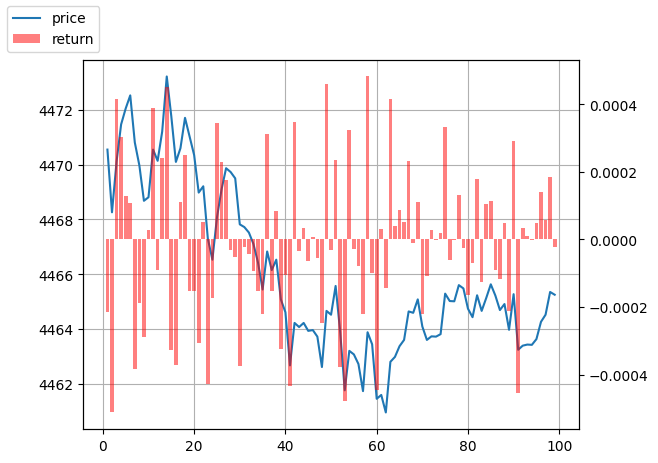
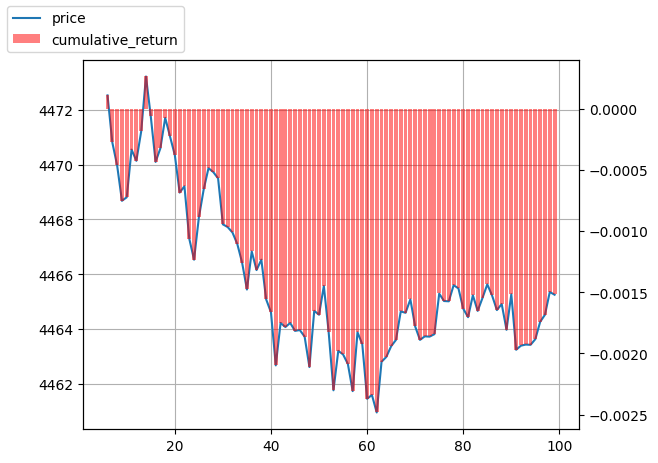